Simple process: let's say you have two populations, D and R, each with a preference For down-ballot R candidates or Against, and also a preference For or Against the R president.

Let's model these as *probabilities* for downballot R candidates and for the R president like so:

In [88]:
D = {
    'downballot': 0.05, # 0.05 chance to vote for R down-ballot
    'president': 0.1 # 0.1 chance to vote for the R president
}

R = {
    'downballot': 0.99,
    'president': 0.5
}

Great now let's simulate a bunch of precincts with different fractions of R vs. D voters.

In [89]:
import numpy as np
r_percentages = np.random.rand(1000) # modeling the fraction of r_voters in a precint, randomly

Now let's simulate some per-precint votes and collect % of downballot-R votes as well as president-R votes within that precint.

In [90]:
downballot_r_percentages = []
president_r_percentages = []

choices = ['R', 'D']

for percentage in r_percentages:
    # Assume all precincts are the same size
    N = 100
    
    # Simulate the two dice-rollers: D and R voters
    num_r = int(percentage*N)
    num_d = int((1-percentage)*N)
    
    # Do some dicerolls
    r_downballot_votes = np.random.choice(choices, num_r, p=[R['downballot'], 1-R['downballot']])
    r_president_votes = np.random.choice(choices, num_r, p=[R['president'], 1-R['president']])
    
    d_downballot_votes = np.random.choice(choices, num_d, p=[D['downballot'], 1-D['downballot']])
    d_president_votes = np.random.choice(choices, num_d, p=[D['president'], 1-D['president']])
    
    # Collect the percentages of votes
    def get_r_percentage(r_votes, d_votes):
        pooled_votes = np.concatenate([r_votes, d_votes])
        pooled_r_votes = pooled_votes == 'R'
        
        return np.sum(pooled_r_votes)*1.0 / len(pooled_votes)
    
    percentage_downballot_r = get_r_percentage(r_downballot_votes, d_downballot_votes)
    percentage_president_r = get_r_percentage(r_president_votes, d_president_votes)
    
    downballot_r_percentages.append(percentage_downballot_r)
    president_r_percentages.append(percentage_president_r)
    
downballot_r_percentages = np.array(downballot_r_percentages)
president_r_percentages = np.array(president_r_percentages)

Text(0, 0.5, '% downballot republican votes - % trump votes')

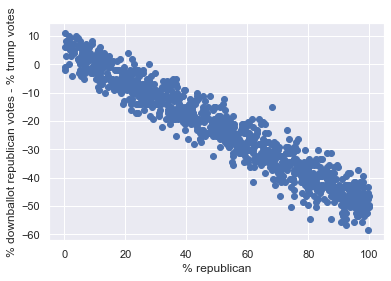

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

diffs = president_r_percentages - downballot_r_percentages
plt.scatter(r_percentages*100, diffs*100)
plt.xlabel('% republican')
plt.ylabel('% downballot republican votes - % trump votes')